In [2]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import numpy as np
import re
import time
import datetime
import matplotlib.dates as mdates
from math import ceil

from collections import Counter

In [ ]:
#plot all the game session
#do some basic calculation
#fix the scatter
#we record iphone while playing

In [2]:
demo = pd.read_csv("/Users/xueguoliang/Desktop/Data_v2/FlappyBird-abe6cb885fbe3973c099984ddc7b3e96-2017-06-26-18-11.csv", delimiter=";")
demo["Score"]

0      0
1      1
2      0
3      2
4      0
5     28
6    104
Name: Score, dtype: int64

In [5]:
data_104= demo.iloc[-1,:]  
print (data_104)

Player                              abe6cb885fbe3973c099984ddc7b3e96
TimeStarted                                      2017-06-26 18:14:18
TimeEnded                                        2017-06-26 18:19:35
Score                                                            104
EmojiScore                                                        24
EmojiTimestamps    ["2017-06-26 18:14:24", "2017-06-26 18:14:37",...
Heartbeats         ["77#2017-06-26 18:14:19", "78#2017-06-26 18:1...
SkinTemperature    ["34.43#2017-06-26 18:14:45", "34.49#2017-06-2...
GSR                ["2065#2017-06-26 18:14:19", "2058#2017-06-26 ...
RRinterval         ["0.779824#2017-06-26 18:14:19", "0.779824#201...
Name: 6, dtype: object


In [50]:
emoji = re.findall("\[(.*?)\]", data_104["EmojiTimestamps"])
print (emoji)

e_timestamp = []
track = []
xi = []
for c in emoji[0].split(","):
    c = c.strip()[1:-1]
    e_timestamp.append(c)
     
for e in e_timestamp:
    for i,t in enumerate(times):
        if e == t:
            xi.append(i)
            track.append(int(rates[i]))
            
print (track)  
print (xi)

['"2017-06-26 18:14:24", "2017-06-26 18:14:37", "2017-06-26 18:14:38", "2017-06-26 18:15:02", "2017-06-26 18:15:10", "2017-06-26 18:15:33", "2017-06-26 18:15:34", "2017-06-26 18:15:50", "2017-06-26 18:16:02", "2017-06-26 18:16:24", "2017-06-26 18:16:29", "2017-06-26 18:16:43", "2017-06-26 18:17:21", "2017-06-26 18:17:40", "2017-06-26 18:17:56", "2017-06-26 18:18:07", "2017-06-26 18:18:19", "2017-06-26 18:18:43", "2017-06-26 18:18:56", "2017-06-26 18:19:03", "2017-06-26 18:19:07", "2017-06-26 18:19:10", "2017-06-26 18:19:32", "2017-06-26 18:19:34"']
[78, 78, 80, 66, 65, 72, 72, 68, 79, 77, 74, 76, 74, 68, 78, 64, 67, 64, 64, 64, 75, 73, 69, 72]
[5, 18, 19, 43, 51, 74, 75, 104, 126, 131, 144, 145, 183, 202, 218, 229, 241, 265, 278, 285, 289, 292, 314, 316]


[Timestamp('2017-06-26 18:14:24'), Timestamp('2017-06-26 18:14:37'), Timestamp('2017-06-26 18:14:38'), Timestamp('2017-06-26 18:15:02'), Timestamp('2017-06-26 18:15:10'), Timestamp('2017-06-26 18:15:33'), Timestamp('2017-06-26 18:15:34'), Timestamp('2017-06-26 18:16:02'), Timestamp('2017-06-26 18:16:24'), Timestamp('2017-06-26 18:16:29'), Timestamp('2017-06-26 18:16:43'), Timestamp('2017-06-26 18:16:43'), Timestamp('2017-06-26 18:17:21'), Timestamp('2017-06-26 18:17:40'), Timestamp('2017-06-26 18:17:56'), Timestamp('2017-06-26 18:18:07'), Timestamp('2017-06-26 18:18:19'), Timestamp('2017-06-26 18:18:43'), Timestamp('2017-06-26 18:18:56'), Timestamp('2017-06-26 18:19:03'), Timestamp('2017-06-26 18:19:07'), Timestamp('2017-06-26 18:19:10'), Timestamp('2017-06-26 18:19:32'), Timestamp('2017-06-26 18:19:34')] [78, 78, 80, 66, 65, 72, 72, 68, 79, 77, 74, 76, 74, 68, 78, 64, 67, 64, 64, 64, 75, 73, 69, 72]


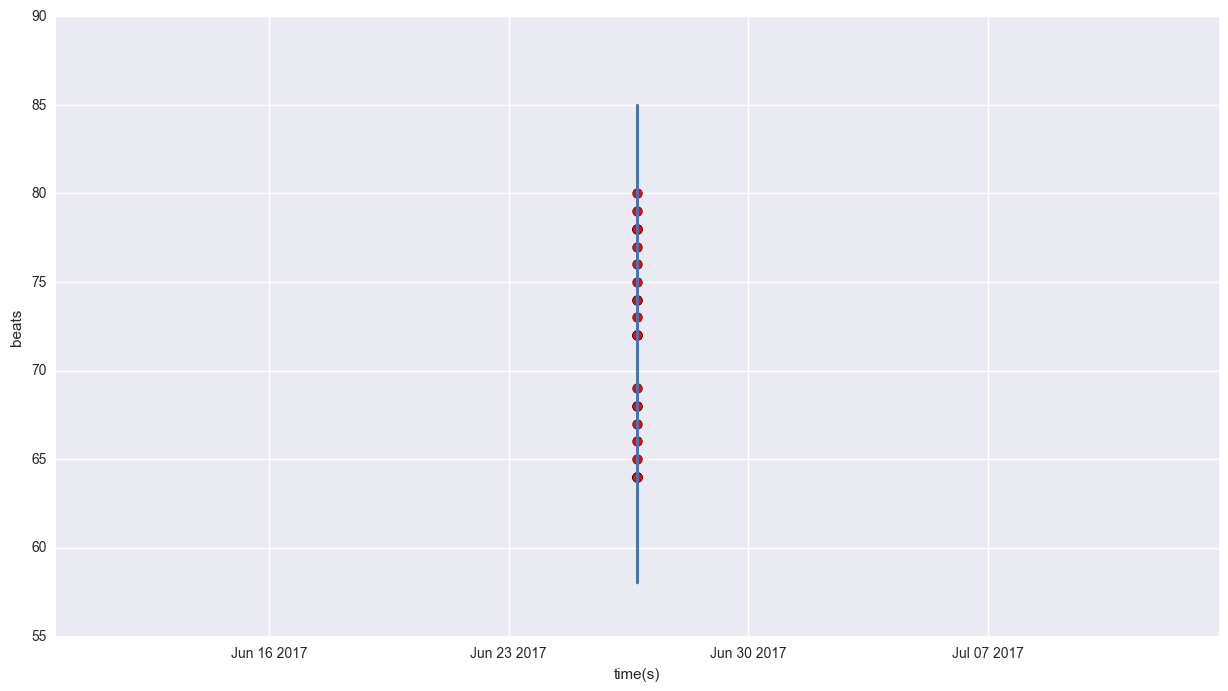

In [65]:
start = data_104["TimeStarted"]
end = data_104["TimeEnded"]

times, rates = extract_split_data(data_104["Heartbeats"])

x = [pd.to_datetime(t) for t in times]


emoj = re.findall("\[(.*?)\]", data_104["EmojiTimestamps"])

e_timestamp = []
track = []
xi = []
for c in emoj[0].split(","):
    c = (c.strip()[1:-1])
    e_timestamp.append(c)
    
    
for e in e_timestamp:
    for i,t in enumerate(times):
        if e == t:
            xi.append(pd.to_datetime(t))
            track.append(int(rates[i]))
print (xi,track)




fig, ax = plt.subplots(figsize=(15,8))


plt.scatter(xi,track,c="r",s=50)
plt.plot(x,rates)
#ax.set_xticks(ax.get_xticks()[::2])
ax.set_xlabel("time(s)")
ax.set_ylabel("beats") 



plt.show()

[datetime.datetime(2017, 6, 26, 18, 14, 24), datetime.datetime(2017, 6, 26, 18, 14, 37), datetime.datetime(2017, 6, 26, 18, 14, 38), datetime.datetime(2017, 6, 26, 18, 15, 2), datetime.datetime(2017, 6, 26, 18, 15, 10), datetime.datetime(2017, 6, 26, 18, 15, 33), datetime.datetime(2017, 6, 26, 18, 15, 34), datetime.datetime(2017, 6, 26, 18, 16, 2), datetime.datetime(2017, 6, 26, 18, 16, 24), datetime.datetime(2017, 6, 26, 18, 16, 29), datetime.datetime(2017, 6, 26, 18, 16, 43), datetime.datetime(2017, 6, 26, 18, 16, 43), datetime.datetime(2017, 6, 26, 18, 17, 21), datetime.datetime(2017, 6, 26, 18, 17, 40), datetime.datetime(2017, 6, 26, 18, 17, 56), datetime.datetime(2017, 6, 26, 18, 18, 7), datetime.datetime(2017, 6, 26, 18, 18, 19), datetime.datetime(2017, 6, 26, 18, 18, 43), datetime.datetime(2017, 6, 26, 18, 18, 56), datetime.datetime(2017, 6, 26, 18, 19, 3), datetime.datetime(2017, 6, 26, 18, 19, 7), datetime.datetime(2017, 6, 26, 18, 19, 10), datetime.datetime(2017, 6, 26, 18, 1

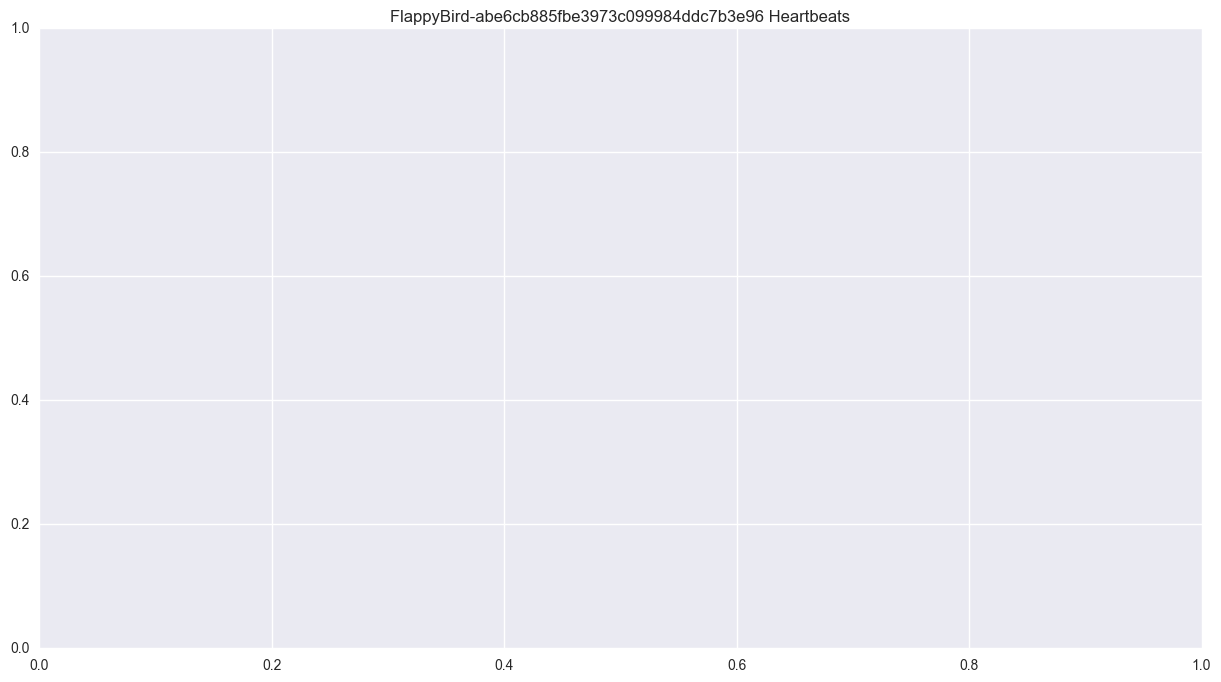

In [59]:
start = data_104["TimeStarted"]
end = data_104["TimeEnded"]

times, rates = extract_split_data(data_104["Heartbeats"])

#print (times)
x = [datetime.datetime.strptime(t,'%Y-%m-%d %H:%M:%S') for t in times]


emoj = re.findall("\[(.*?)\]", data_104["EmojiTimestamps"])

e_timestamp = []
track = []
xi = []
for c in emoj[0].split(","):
    c = (c.strip()[1:-1])
    e_timestamp.append(c)
    
    
for e in e_timestamp:
    for i,t in enumerate(times):
        if e == t:
            xi.append(datetime.datetime.strptime(t,'%Y-%m-%d %H:%M:%S'))
            track.append(int(rates[i]))
print (xi,track)

fig, ax = plt.subplots(figsize=(15,8))
plt.title("FlappyBird-abe6cb885fbe3973c099984ddc7b3e96 Heartbeats")

'''
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

plt.scatter(xi,track,c="r",s=50)
plt.plot(x,rates)
plt.gcf().autofmt_xdate()

plt.ylim([50,90])
#ax.set_xticks(ax.get_xticks()[::2])
ax.set_xlabel("time(s)")
ax.set_ylabel("beats") 

'''

plt.show()

In [4]:
# define functions we need in the following
def extract_split_data(data):    
    content = re.findall("\[(.*?)\]", data)
    timestamps = []
    values = []
    for c in content[0].split(","):
        c = (c.strip()[1:-1])
        if len(c)>21:  
            x, y = c.split("#")
            values.append(x)
            timestamps.append(y) 
    return timestamps, values

22
---------------------


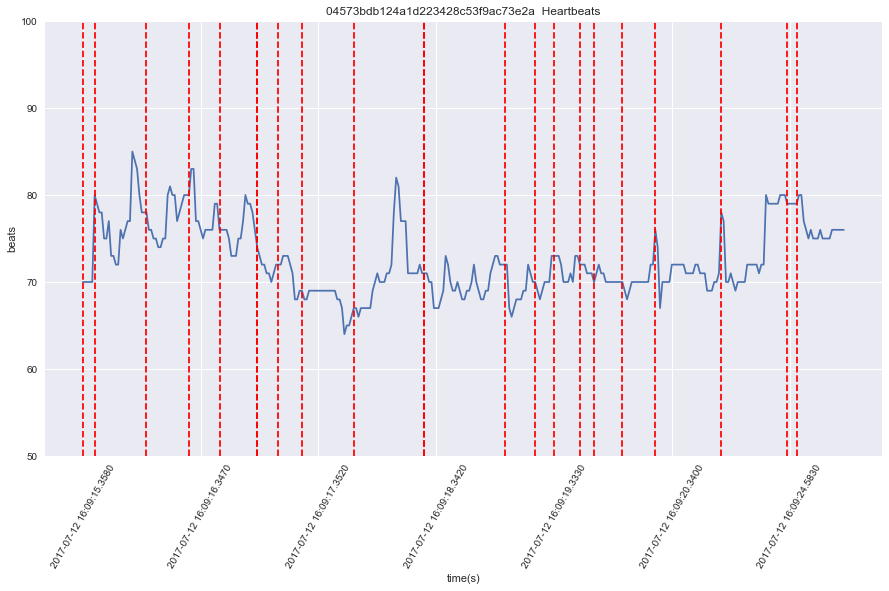

9
---------------------


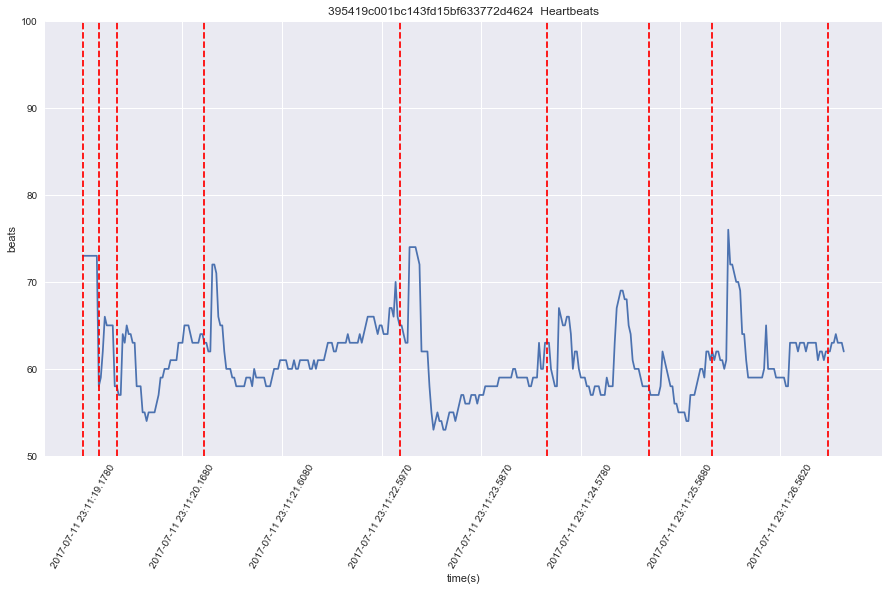

14
---------------------


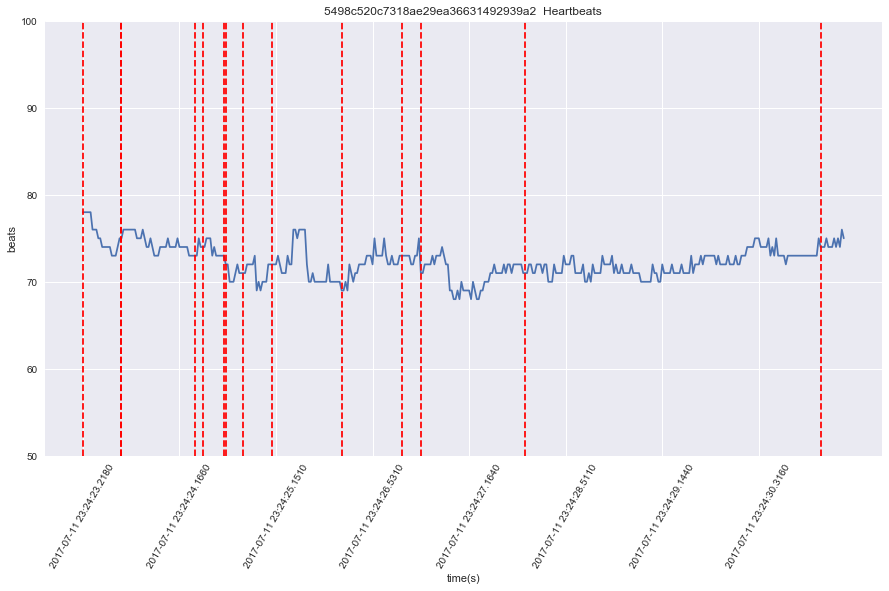

12
---------------------


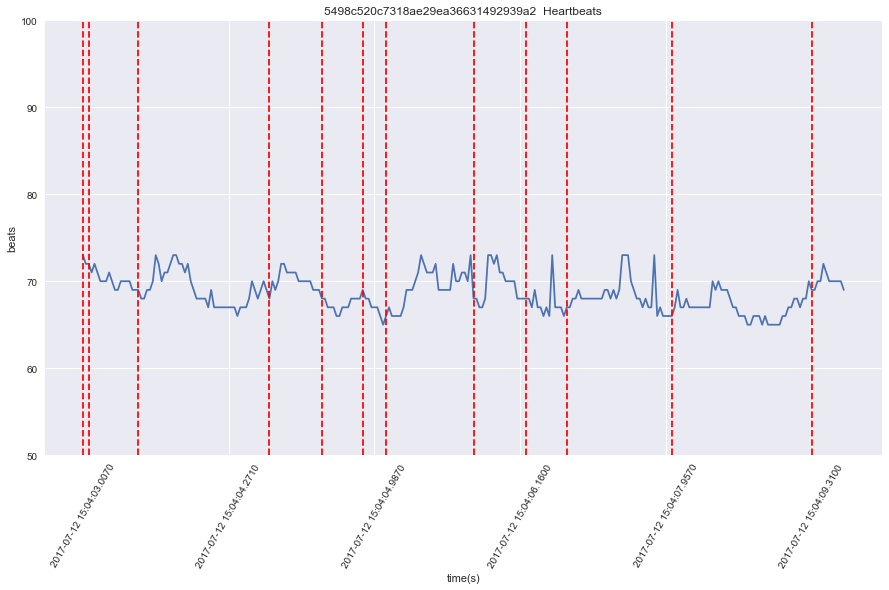

7
---------------------


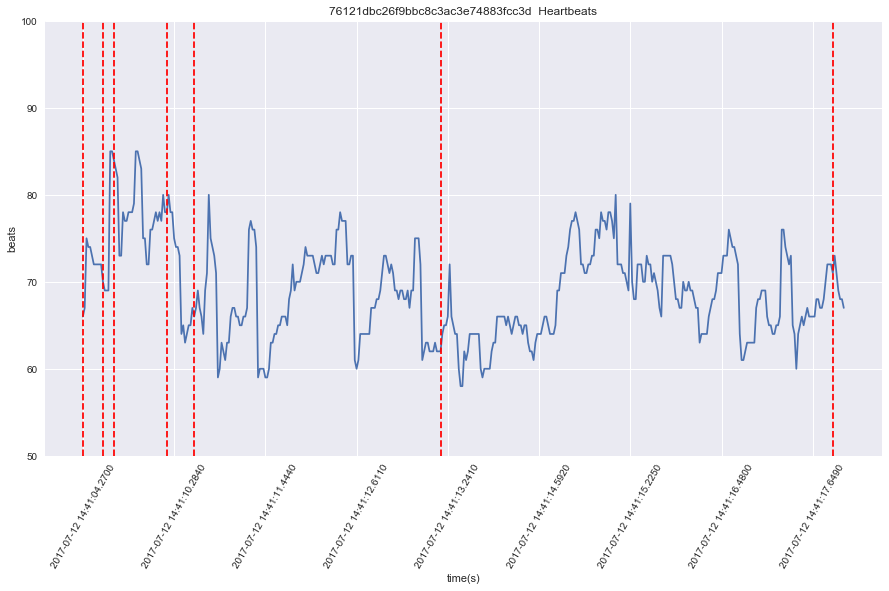

19
---------------------


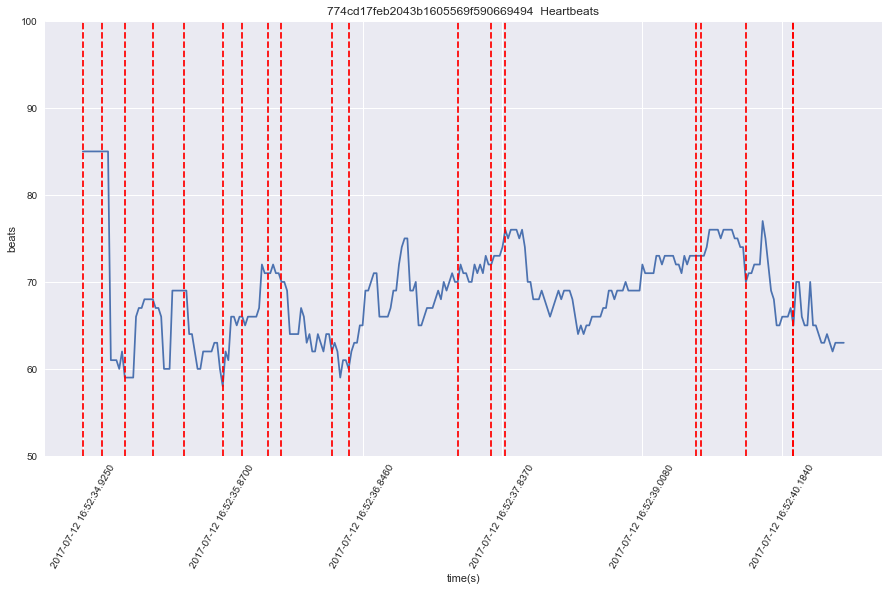

16
---------------------


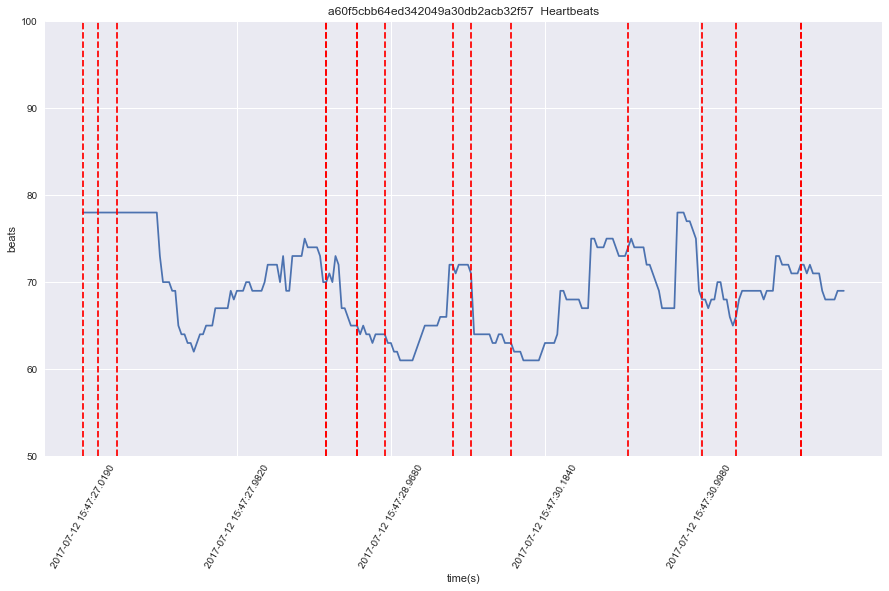

7
---------------------


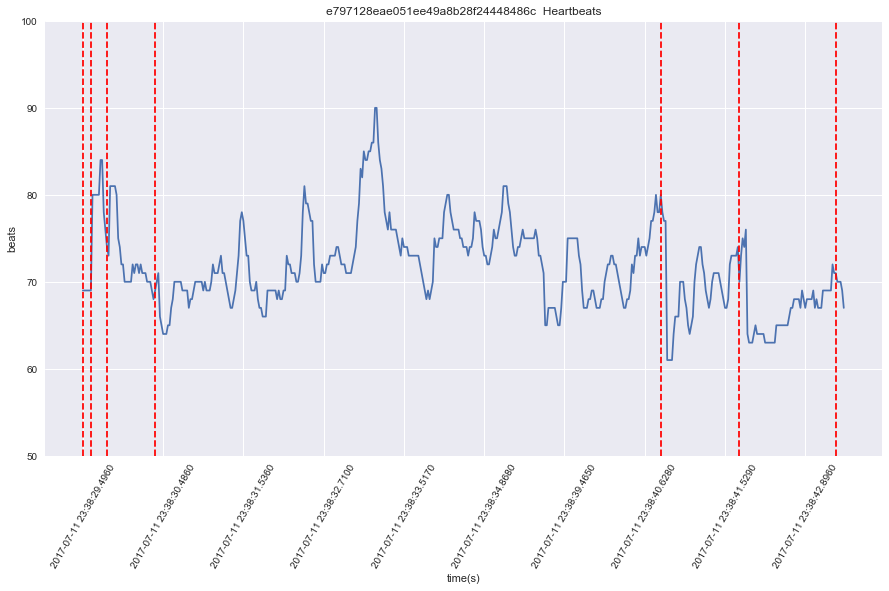

36
---------------------


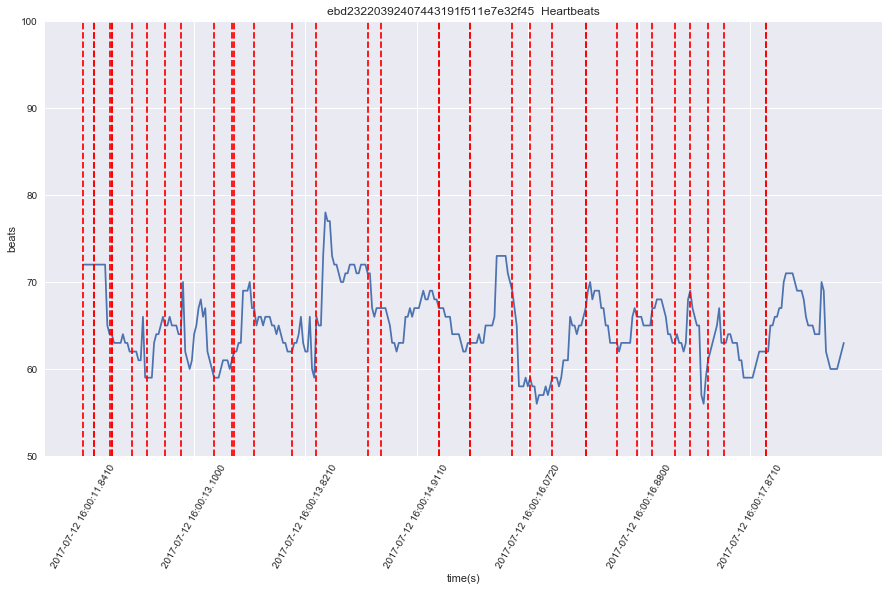

In [5]:
for url in glob.glob("/Users/xueguoliang/Desktop/tmp/*.csv"):
    
    playername = os.path.basename(url).split('-')[1]
    player = pd.read_csv(url, delimiter=";")
    
    times = []
    rates = []
    flags = [0]
    pos = 0
    for session in player['Heartbeats']:       
        time, rate = extract_split_data(session)
        pos += len(time)-1
        if pos>0:
            flags.append(pos)  
        times += time 
        rates += rate
        
    print (len(flags))
    print("---------------------")
    
    
    '''
    #plot the frequency of heartbeats for each player 
    vs = []
    fs = []
    rs = Counter(rates)
    print (r)
    for v in rs:
        vs.append(v)
        fs.append(rs[v])
    sns.barplot(vs, fs)
    plt.show()
    '''
    
     
    
    #plot the heartbeat line for each player  
    x = range(0,len(times),50)
  
    # plot 
    fig, ax = plt.subplots(figsize=(15,8))
    plt.title(playername + "  Heartbeats")
    plt.plot(rates)
    plt.ylim([50,100])
    plt.xticks(x, times, rotation="60")
    ax.set_xlabel("time(s)")
    ax.set_ylabel("beats")
    #plot the session boundaries
    for f in flags:
        plt.axvline(x=f, color='r', linestyle='--')
    plt.show()
    
    

In [5]:
data.columns

Index(['Player', 'TimeStarted', 'TimeEnded', 'Score', 'EmojiScore',
       'EmojiTimestamps', 'Heartbeats', 'SkinTemperature', 'GSR',
       'RRinterval'],
      dtype='object')

In [6]:
def de_timestampe(time):
    
    # get year month date
    y = time.split()[0].split("-")[0]
    m = time.split()[0].split("-")[1]
    d = time.split()[0].split("-")[2]
    #print (y, m, d)
    
    # get hour minute second
    h = time.split()[1].split(":")[0]
    mi = time.split()[1].split(":")[1]
    s = time.split()[1].split(":")[2]
    #print (h, mi, s)
    
    t = m + " " + d + " " + h + ":" + mi + ":" + s + " " +y
    good_format = datetime.datetime.strptime(t, '%m %d %H:%M:%S %Y' )
    
    return good_format


In [20]:
start = data['TimeStarted'].values[0]
end = data['TimeEnded'].values[0]

diff = (de_timestampe(end) - de_timestampe(start)) # difference in seconds
print (diff)

AttributeError: 'str' object has no attribute 'values'

In [8]:
def extract_split_data(column):
    content = re.findall("\[(.*?)\]", data[column].values[0])
    timestamps = []
    values = []
    for c in content[0].split(","):
        c = (c.strip()[1:-1])
        x, y = c.split("#")
        values.append(x)
        timestamps.append(y.split()[1]) 
    return timestamps, values



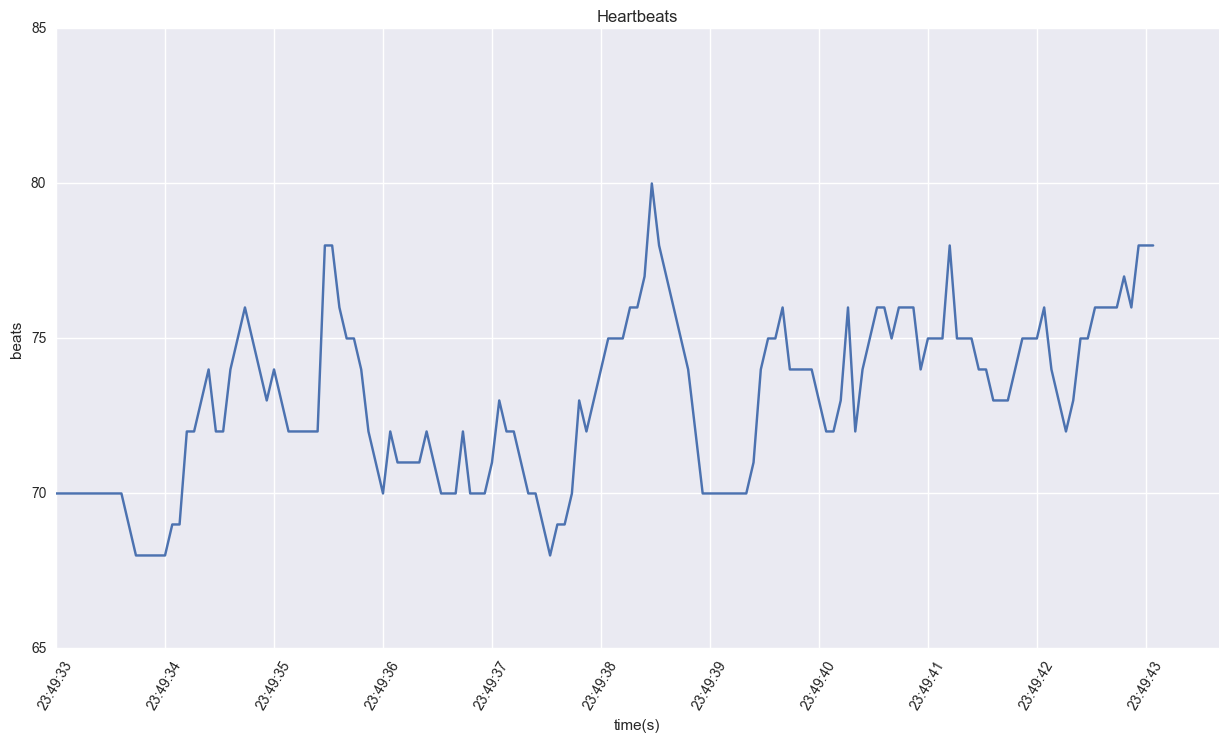

In [49]:
time_hr, value_hr = extract_split_data('Heartbeats')
x = range(0,len(time_hr),15)

# plot
fig, ax = plt.subplots(figsize=(15,8))
plt.title("Heartbeats")
plt.plot(value_hr)
plt.ylim([65,85])
plt.xticks(x, time_hr, rotation="60")
ax.set_xlabel("time(s)")
ax.set_ylabel("beats")
plt.show()



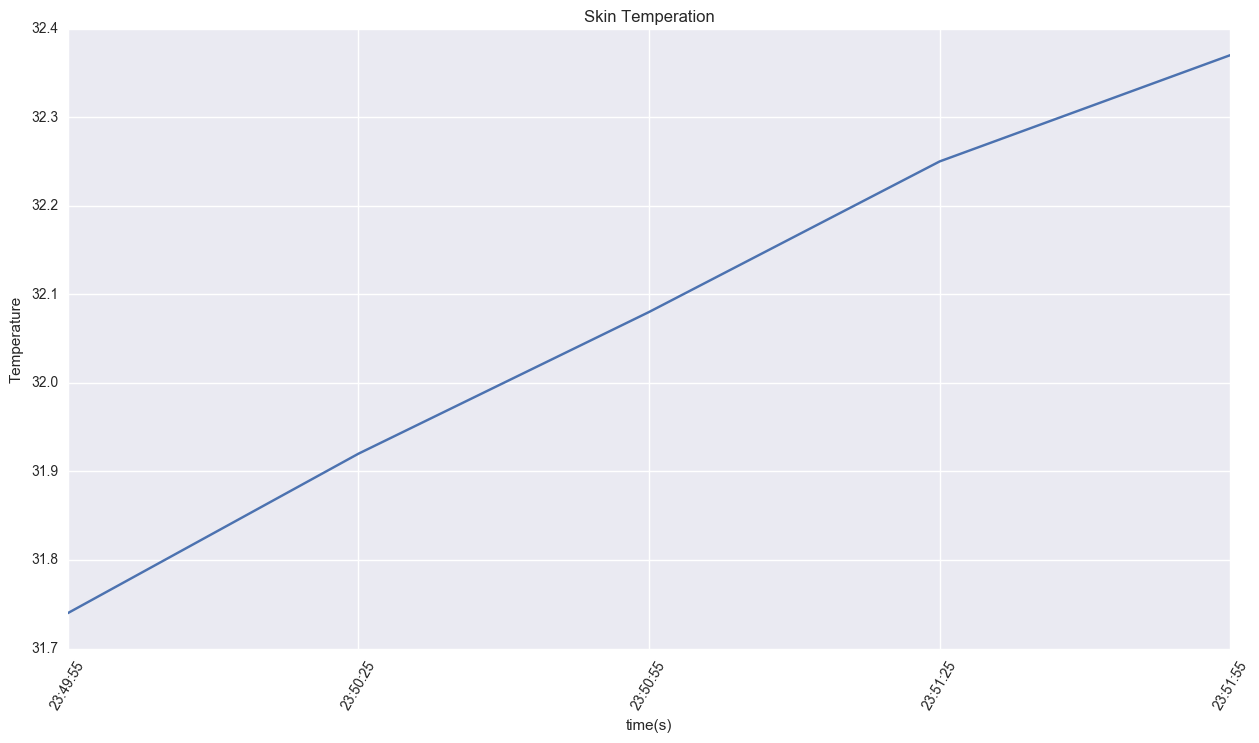

In [46]:
time, value = extract_split_data('SkinTemperature')
x = range(0,len(time),1)

# plot
fig, ax = plt.subplots(figsize=(15,8))
plt.title("Skin Temperation")
plt.plot(value)
plt.xticks(x, time, rotation="60")
ax.set_xlabel("time(s)")
ax.set_ylabel("Temperature")
plt.show()

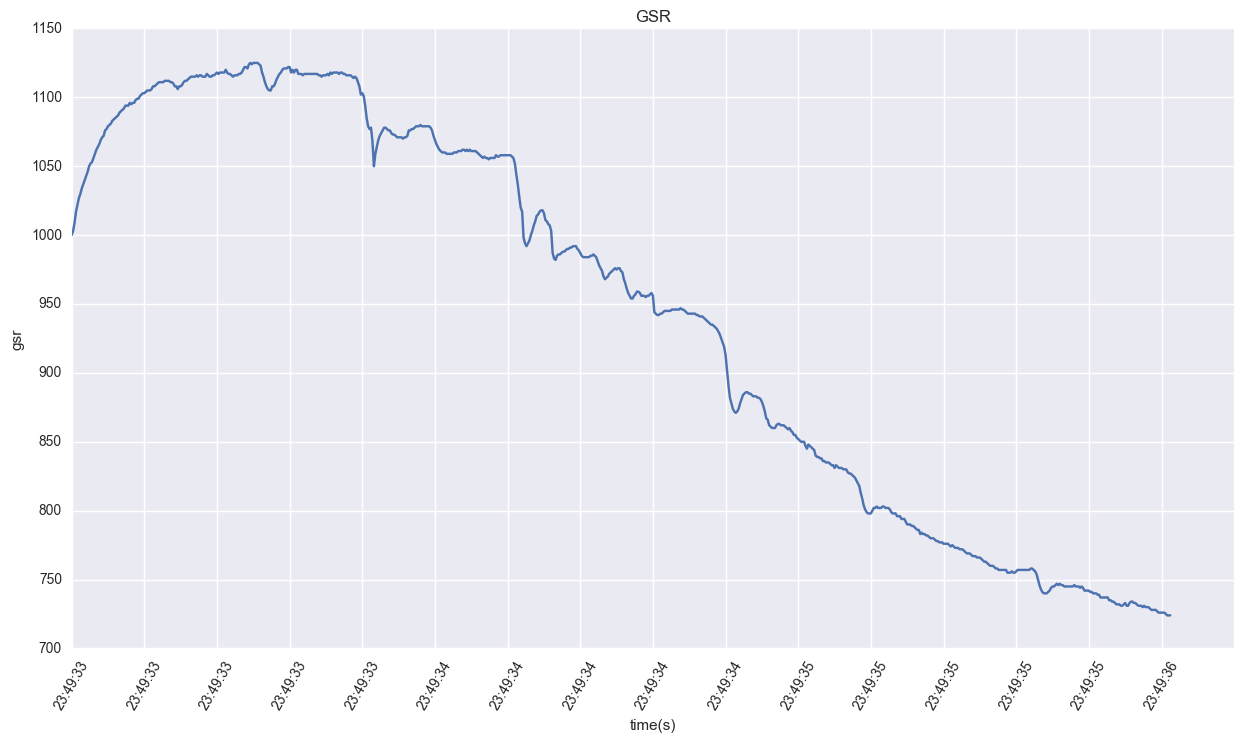

In [12]:
time, value = extract_split_data('GSR')
x = range(0,len(time),50)

# plot
fig, ax = plt.subplots(figsize=(15,8))
plt.title("GSR")
plt.plot(value)
plt.xticks(x, time, rotation="60")
ax.set_xlabel("time(s)")
ax.set_ylabel("gsr")
plt.show()

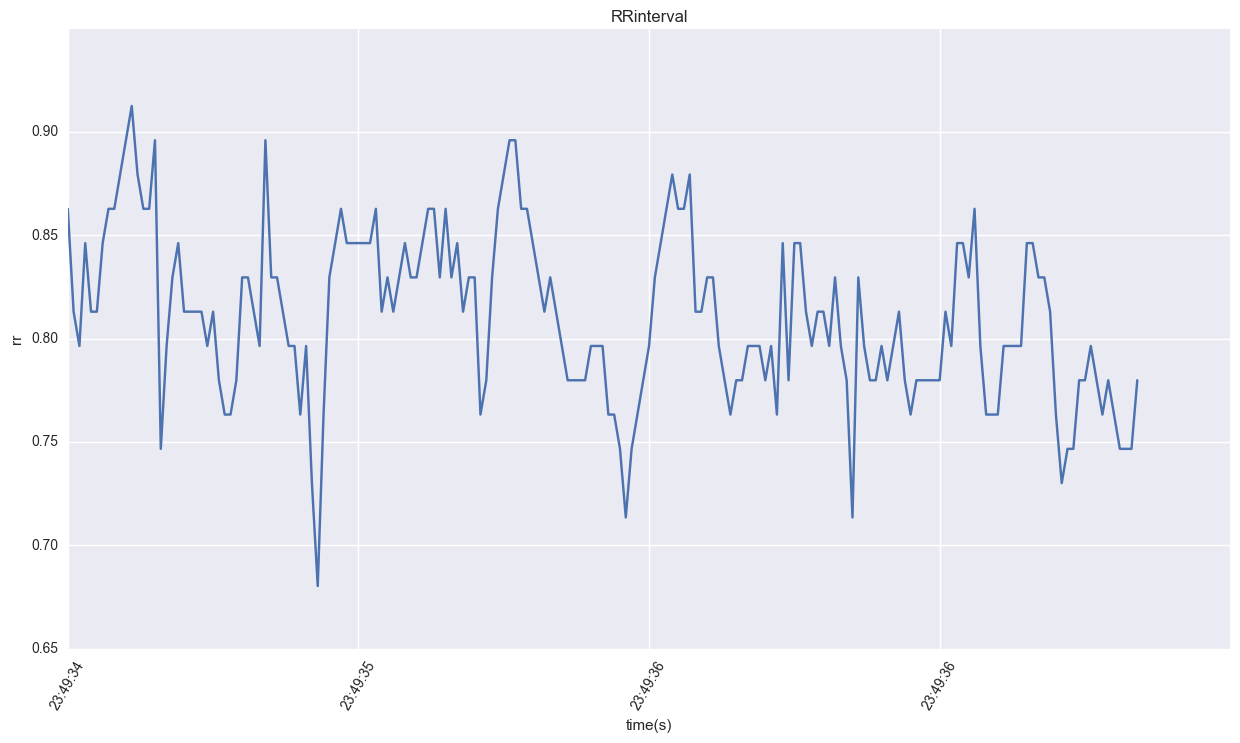

In [13]:
time, value = extract_split_data('RRinterval')
x = range(0,len(time),50)

# plot
fig, ax = plt.subplots(figsize=(15,8))
plt.title("RRinterval")
plt.plot(value)
plt.xticks(x, time, rotation="60")
ax.set_xlabel("time(s)")
ax.set_ylabel("rr")
plt.show()

In [24]:
content = re.findall("\[(.*?)\]", data["EmojiTimestamps"].values[0])

e_timestamp = []
track = []
xi = []
for c in content[0].split(","):
    c = (c.strip()[1:-1]).split()[1]
    e_timestamp.append(c)
    
    
for e in e_timestamp:
    for i,t in enumerate(time_hr):
        if e == t:
            xi.append(i)
            track.append(int(value_hr[i]))
            
print (track)  
print (xi)

[70, 72, 73, 72, 73, 72, 69, 75, 70, 71, 76, 72, 75, 75]
[2, 23, 31, 43, 61, 62, 70, 86, 95, 96, 109, 110, 120, 135]


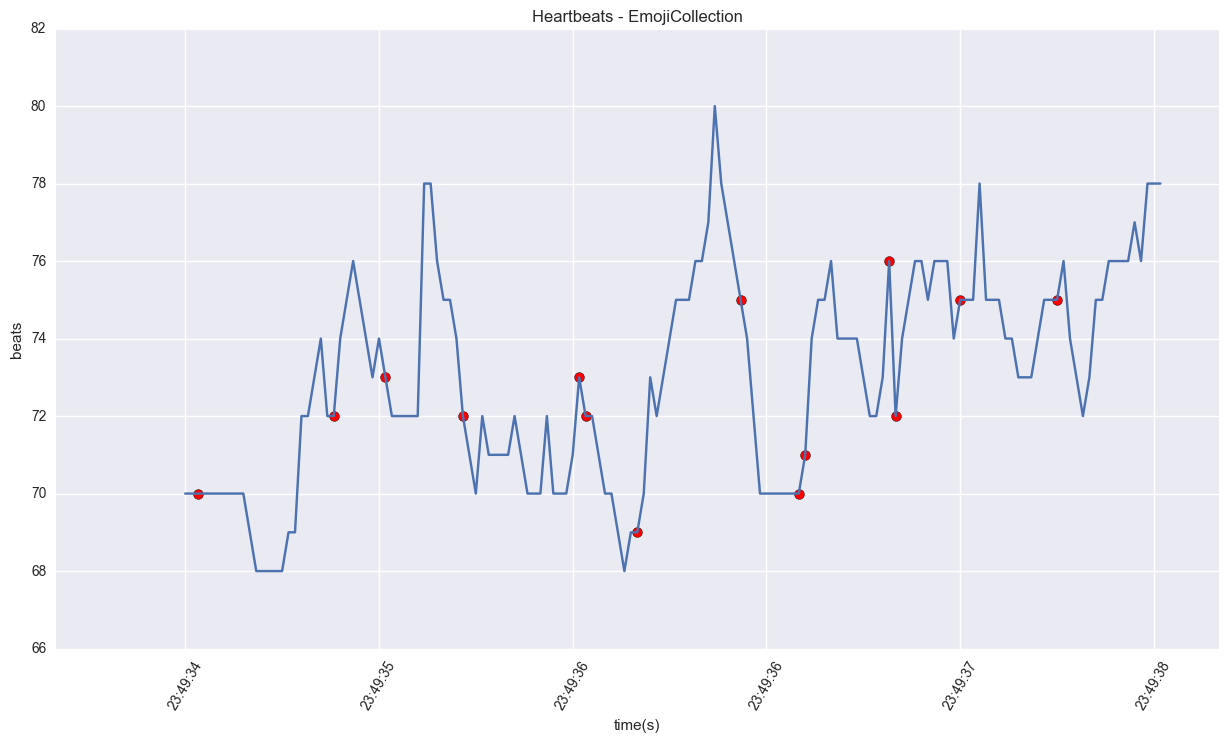

In [44]:
# plot


x = range(0,len(time_hr),30)

fig, ax = plt.subplots(figsize=(15,8))
markers_on = track
plt.plot(value_hr)
plt.scatter(xi,track,c="r",s=50)
plt.xticks(x,time, rotation="60")
plt.title("Heartbeats - EmojiCollection")
ax.set_xlabel("time(s)")
ax.set_ylabel("beats")

plt.show()
